In [1]:
from utils.network import Network
from utils.vectors import Vector
import numpy as np
import random
import matplotlib.pyplot as plt
import pandas as pd

## Network Example

In [2]:
sine_wave = np.array(Vector.generate_nosiey_sin(points=128))
network_example = Network(dataset=sine_wave)
network_example.init_network(layers=3)

{0: <utils.layers.Layer at 0x1188f6cd0>,
 1: <utils.layers.Layer at 0x11890dbd0>,
 2: <utils.layers.Layer at 0x103d54fd0>}

In [3]:
network_example.train_network(epochs=15)
print(
    f' Prediction: {network_example.layers[0].neurons[0].output} | Ground Truth: {network_example.layers[0].neurons[0].y}')

 Prediction: 0.059814007154762205 | Ground Truth: 0.06261427089546592


In [4]:
n = network_example.layers[1]
print(n.states)
test_state = n.neurons[0].state

[(-1.2285280045031888, <utils.neurons.Neuron object at 0x11892a7d0>), (-1.2220772196199903, <utils.neurons.Neuron object at 0x11892a890>), (-1.2049771610430304, <utils.neurons.Neuron object at 0x11892aad0>), (-1.0788534205506346, <utils.neurons.Neuron object at 0x11892a4d0>), (-1.2019790060620876, <utils.neurons.Neuron object at 0x11892a590>), (-1.1785371314512736, <utils.neurons.Neuron object at 0x11892ad90>), (-1.0609301883786881, <utils.neurons.Neuron object at 0x11892aed0>), (-0.28139580877404574, <utils.neurons.Neuron object at 0x11892a410>), (-0.7107035544472512, <utils.neurons.Neuron object at 0x11892a5d0>), (-1.1322852927584357, <utils.neurons.Neuron object at 0x11892a210>), (-1.197442694201643, <utils.neurons.Neuron object at 0x11892a650>), (-1.0808807999909928, <utils.neurons.Neuron object at 0x11892aa50>), (-1.1051703212019777, <utils.neurons.Neuron object at 0x11892ac10>), (-0.7568798559179633, <utils.neurons.Neuron object at 0x11892ae90>), (-0.8895368356094493, <utils.neur

In [5]:
states_np_array = np.array(n.states)
threshold = 0.1
x = states_np_array[abs(states_np_array[:, 0] - test_state) < threshold]
print(len(x))
print(
    f' the searching neuron has a state of {test_state} and the top {len(x)} matches are {x}')

7
 the searching neuron has a state of -0.12793573440557807 and the top 7 matches are [[-0.1459871171757735 <utils.neurons.Neuron object at 0x11892a450>]
 [-0.1541802771953963 <utils.neurons.Neuron object at 0x11892a3d0>]
 [-0.08882071304966771 <utils.neurons.Neuron object at 0x11892ad50>]
 [-0.12793573440557807 <utils.neurons.Neuron object at 0x11890db50>]
 [-0.031052903374965024 <utils.neurons.Neuron object at 0x118929fd0>]
 [-0.18837341831644028 <utils.neurons.Neuron object at 0x11892b010>]
 [-0.10575576355239946 <utils.neurons.Neuron object at 0x11892b1d0>]]


In [6]:
wide_network = Network(dataset=sine_wave)
wide_network.init_network(layers=3)
wide_network.train_network(epochs=3)
print(f'Layers: {wide_network.layers.values()}')
print('')
# Examine single neuron
print(wide_network.layers[1].neurons[0:5])
n1 = wide_network.layers[0].neurons[0]

Layers: dict_values([<utils.layers.Layer object at 0x118967050>, <utils.layers.Layer object at 0x118949f10>, <utils.layers.Layer object at 0x11894bcd0>])



## Neuron

In [7]:
print("inputs type:", n1.x.dtype)
print(
    f" input: {n1.x } | output:{n1.output} | ground truth: {n1.y}, | signal: {n1.signal}")
print("weights:")
print(n1.weights)

inputs type: float64
 input: 0.0 | output:0.0380972826715551 | ground truth: 0.06261427089546592, | signal: [-0.33962474  0.03809728]
weights:
[[0.57226619 0.64338713 0.50163301]
 [0.40788089 0.62363545 0.96939294]]


In [8]:

wide_network.train_network(epochs=20)

In [9]:
c = []
for layer in wide_network.layers.values():
    for node in layer.neurons:
        c.append(node.state)
print(c)

[-0.2899236439886635, 0.07612140847070414, -0.03200031604328002, 0.24268803770751235, 0.18265510054570055, -0.08937686290411007, 0.5341141159868665, 0.7935193203860047, 0.7293575157131723, 0.8176601999989122, 0.2590435261781251, -0.9852534461596802, 0.5440659093326236, 0.6039111955388694, 0.8090631647823314, 1.2756979700759672, 0.773152262775029, 0.06319997192634924, 0.9176338252205741, 0.980776505769662, 0.8944154138143583, 0.028874678762215583, 1.1320504742752282, 0.016900005201028634, 1.0686059103058332, 0.863811755982679, 1.568304298543218, 1.267740823397892, 1.028051167855853, 1.1007705841163813, 1.2982053395243862, 0.8316982811192561, 1.6320590330329035, 1.1135855156192962, 1.1226232051652938, 1.3141208658300387, 0.788578791599856, 1.1840848970581537, 0.8161007188862612, 1.0932886906587074, 0.8984099236431581, 1.0689097000597712, 0.9095296574501026, -0.23445270464862053, 1.1079201964874499, 1.171134381525658, 0.48736195787846276, 0.7335221451386102, 0.35805804127998697, 0.7971833

In [10]:
c = np.array(c)
print(c.std())

0.8445172047235429


In [11]:
c = np.array([round(i, 3) for i in c])

(array([ 4., 27., 51., 59., 43., 37., 50., 50., 50., 13.]),
 array([-1.792 , -1.4378, -1.0836, -0.7294, -0.3752, -0.021 ,  0.3332,
         0.6874,  1.0416,  1.3958,  1.75  ]),
 <BarContainer object of 10 artists>)

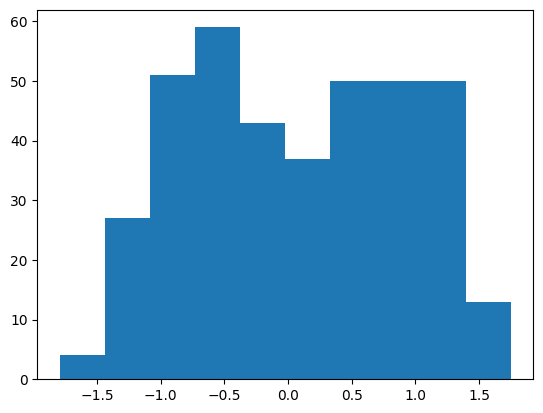

In [12]:
plt.hist(c)

In [13]:
delta_img = []

for layer in wide_network.layers.values():
    r = []
    for node in layer.neurons:
        r.append(node.state)
    delta_img.append(r)

In [19]:
# Create an image using the data
size = int(len(delta_img[1]) ** 0.5)

img_one = delta_img[1]
data = np.array(img_one).reshape(size, size)

print(len(data))
plt.imshow(data, cmap='gray')  # 'gray' colormap for grayscale
plt.axis('off')  # Turn off axis

# Save the image
plt.savefig('output_image.png', bbox_inches='tight', pad_inches=0)

plt.show()

TypeError: can't multiply sequence by non-int of type 'list'